# Tokenization

LLMs don’t process raw text directly; instead, they first convert the text into discrete tokens which are then mapped to numerical representations. This tokenization step is essential because neural networks operate on numbers, not characters or words, and breaking text into tokens allows the model to handle a vast vocabulary efficiently, including unknown or rare words via subword techniques.

In Natural Language Processing (NLP), tokenization is the process of breaking down text into smaller units, called tokens. These tokens can be words, subwords, or characters, depending on the level of granularity required for a given NLP task.

![tokens with llms](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*pzxlxBMXbnbNoiPfYVWyNw.png)

## Simple Tokenizer

The simplest tokenizer assigns a unique number to each character, such as its [Unicode](https://en.wikipedia.org/wiki/Unicode) numerical representation.

In [1]:
ord?

Signature: ord(c, /)
Docstring: Return the Unicode code point for a one-character string.
Type:      builtin_function_or_method

In [2]:
def tokenize(text):
    return [ord(char) for char in text]

In [3]:
tokens = tokenize("Learn anytime, anywhere with online courses or join us on campus this spring.")
print(tokens)

[76, 101, 97, 114, 110, 32, 97, 110, 121, 116, 105, 109, 101, 44, 32, 97, 110, 121, 119, 104, 101, 114, 101, 32, 119, 105, 116, 104, 32, 111, 110, 108, 105, 110, 101, 32, 99, 111, 117, 114, 115, 101, 115, 32, 111, 114, 32, 106, 111, 105, 110, 32, 117, 115, 32, 111, 110, 32, 99, 97, 109, 112, 117, 115, 32, 116, 104, 105, 115, 32, 115, 112, 114, 105, 110, 103, 46]


## Pre-Trained Tokenizer

Before programmatically obtaining tokens for any text using a pre-trained tokenizer, let's first check out the web app: https://tiktokenizer.vercel.app/

Tokenezation is a process of splitting input text into smaller units, called **tokens**.
After tokenezation, each token is assigned an index in the vocabulary.

A tokenizer is technically a separate component from an embeddings model or a large language model, yet it is not unrelated. Large language models rely on a specific tokenizer’s vocabulary, and once chosen, that tokenization scheme remains fixed throughout the training process.

Let's use the most popular BERT (_Bidirectional Encoder Representations from Transformers_) model—https://huggingface.co/google-bert/bert-base-uncased - but only for tokenization, without using the model itself.

In [4]:
from transformers import AutoTokenizer

In [5]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [6]:
text = "Hello, how are you today?"

In [7]:
tokens = tokenizer.tokenize(text)
# Mapping: https://huggingface.co/google-bert/bert-base-uncased/blob/main/vocab.txt
print("Tokens:", tokens)

Tokens: ['hello', ',', 'how', 'are', 'you', 'today', '?']


In [8]:
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print("Token IDs:", token_ids)

Token IDs: [7592, 1010, 2129, 2024, 2017, 2651, 1029]


In [9]:
!wget https://huggingface.co/google-bert/bert-base-uncased/resolve/main/vocab.txt

--2025-02-24 21:31:20--  https://huggingface.co/google-bert/bert-base-uncased/resolve/main/vocab.txt
Resolving huggingface.co (huggingface.co)... 108.138.246.85, 108.138.246.67, 108.138.246.71, ...
connected. to huggingface.co (huggingface.co)|108.138.246.85|:443... 
HTTP request sent, awaiting response... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


200 OK
Length: 231508 (226K) [text/plain]
Saving to: ‘vocab.txt’

vocab.txt           100%[===================>] 226.08K  --.-KB/s    in 0.09s   

2025-02-24 21:31:20 (2.43 MB/s) - ‘vocab.txt’ saved [231508/231508]



In [10]:
!cat -n vocab.txt | grep "today"

  2652	today


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


The word "today" appears on line 2652, corresponding to ID 2651.

## Training Tokenizer

In the world of Large Language Models, the tokenizer usually trained with [Byte pair encoding](https://en.wikipedia.org/wiki/Byte_pair_encoding) algorithm.

- Byte-pair Encoding (PBE): https://en.wikipedia.org/wiki/Byte_pair_encoding
- BPE implementation: https://huggingface.co/learn/nlp-course/en/chapter6/5
- BPE implementation in OpenAI GPT-2: https://github.com/openai/gpt-2/blob/master/src/encoder.py
- Build a tokenizer from scratch using BPE: https://huggingface.co/docs/tokenizers/en/quicktour

The wikitext-103-raw dataset contains raw, unprocessed text from verified Wikipedia articles, designed for character-level language modeling tasks. We can download it from here:

In [11]:
!wget https://wikitext.smerity.com/wikitext-103-raw-v1.zip

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-02-24 21:31:20--  https://wikitext.smerity.com/wikitext-103-raw-v1.zip
104.21.16.1, 104.21.48.1, 104.21.64.1, ...merity.com)... 
connected. to wikitext.smerity.com (wikitext.smerity.com)|104.21.16.1|:443... 
200 OKequest sent, awaiting response... 
Length: 191984949 (183M) [application/zip]
Saving to: ‘wikitext-103-raw-v1.zip’

wikitext-103-raw-v1 100%[===================>] 183.09M  6.64MB/s    in 30s     

2025-02-24 21:31:51 (6.11 MB/s) - ‘wikitext-103-raw-v1.zip’ saved [191984949/191984949]



In [12]:
!unzip -o wikitext-103-raw-v1.zip

Archive:  wikitext-103-raw-v1.zip
   creating: wikitext-103-raw/
  inflating: wikitext-103-raw/wiki.test.raw  
  inflating: wikitext-103-raw/wiki.valid.raw  
  inflating: wikitext-103-raw/wiki.train.raw  

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [13]:
!head wikitext-103-raw/wiki.test.raw

 
 = Robert Boulter = 
 
 Robert Boulter is an English film , television and theatre actor . He had a guest @-@ starring role on the television series The Bill in 2000 . This was followed by a starring role in the play Herons written by Simon Stephens , which was performed in 2001 at the Royal Court Theatre . He had a guest role in the television series Judge John Deed in 2002 . In 2004 Boulter landed a role as " Craig " in the episode " Teddy 's Story " of the television series The Long Firm ; he starred alongside actors Mark Strong and Derek Jacobi . He was cast in the 2005 theatre productions of the Philip Ridley play Mercury Fur , which was performed at the Drum Theatre in Plymouth and the Menier Chocolate Factory in London . He was directed by John Tiffany and starred alongside Ben Whishaw , Shane Zaza , Harry Kent , Fraser Ayres , Sophie Stanton and Dominic Hall . 
 In 2006 , Boulter starred alongside Whishaw in the play Citizenship written by Mark Ravenhill . He appeared on a 20

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


We can now train our own tokenizer!

In [14]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import ByteLevel

tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
trainer = BpeTrainer(
    vocab_size=30000, 
    min_frequency=2,
    special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"]
)

tokenizer.pre_tokenizer = ByteLevel()  # More robust than Whitespace

files = [f"wikitext-103-raw/wiki.{split}.raw" for split in ["test", "train", "valid"]]
tokenizer.train(files, trainer)

In [15]:
tokenizer.save("tokenizer-wiki.json")

In [26]:
import json
import random

with open("tokenizer-wiki.json", "r") as tokenizer_metadata:
    tokenizer_metadata_dict = json.load(tokenizer_metadata)

vocab = tokenizer_metadata_dict["model"]["vocab"]
random_keys = random.sample(list(vocab.keys()), 10)
for key in random_keys:
    print(f'{key}: {vocab[key]}')

ional: 1273
Ġwhere: 764
ĠCob: 8363
kie: 20937
ĠStrauss: 23321
Ġpresents: 12154
ĠVeter: 17072
ĠVine: 26738
ĠGavin: 22930
ĠForth: 25161


## Vocab in Embedding Layer

LLMs typically use an embedding layer as their first layer to convert discrete tokens into continuous vector representations.

PyTorch provides and embeddings layer: [torch.nn.Embedding](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) - It is a simple lookup table that stores embeddings of a fixed dictionary and size. For example, in GPT-3 architecture, the **embedding layer** transforms input tokens into dense vectors of size 12,288 dimensions. Such a large vector facilitating the model’s ability to capture complex linguistic patterns and relationships. Given GPT-3’s vocabulary size of 50,257 tokens, the embedding layer comprises approximately 617 million parameters: $12,288 * 50,257 = 617,558,016$.

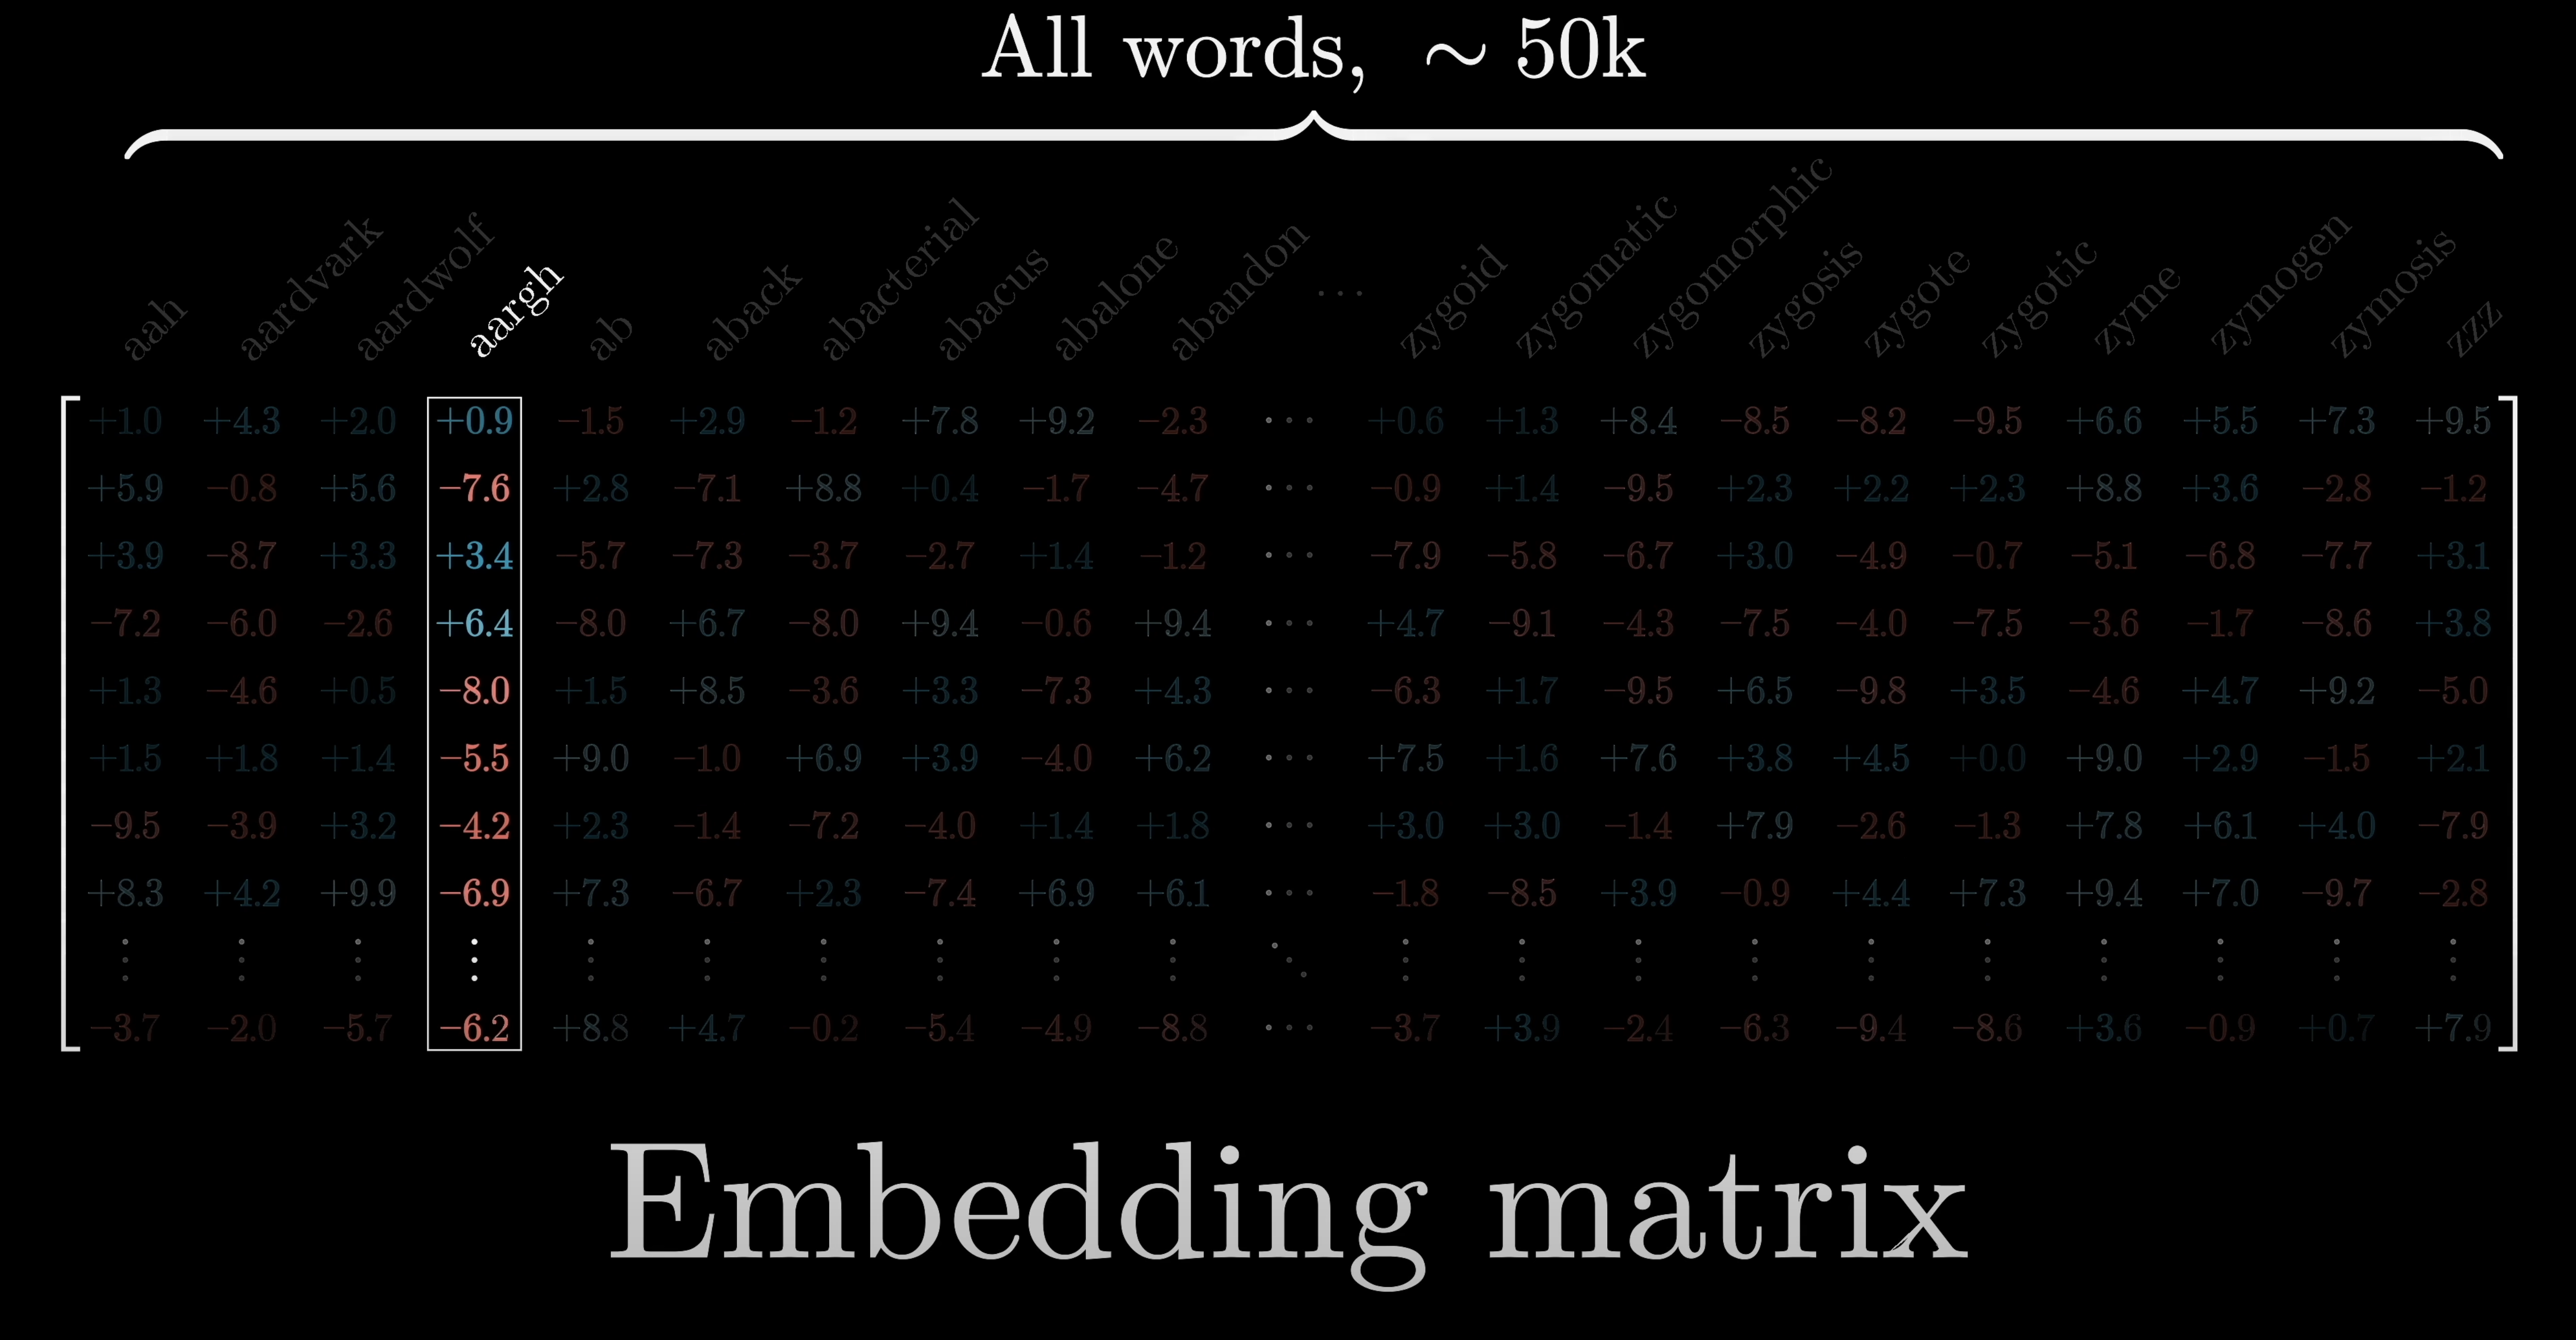

In [27]:
from IPython.display import Image, display

display(Image(filename="/Users/dima/Documents/second-brain/_assets/images/ai_ml/embedding_matrix.png"))